<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-starmath4/blob/main/Sep8-9/Ejercicio_9_de_septiembre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from pandas.core.api import DataFrame
df=pd.read_csv("/content/CarPrice_Assignment.csv")

df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Categorizando las variables:



1. Car-ID: Numérica discreta
2. Symboling: Numérica discreta
3. Car Name: Categórica nominal
4. Fueltype: Categórica nominal
5. Aspiration: Categórica nominal
6. Doornumber: Numérica discreta
7. Carbody: Categórica nominal
8. Drivewheel: Categórica nominal
9. Enginelocation: Categórica nominal
10. Wheelbase: Numérica continua
11. Carlength: Numérica continua
12. Carwitdh: Numérica continua
13. Carheight: Numérica continua
14. Carweight: Numérica continua
15. Enginetype: Numérica continua
16. Cylinder Number: Numérica discreta
17. Engine size: Numérica continua
18. Fuel system: Categórica ordinal
19. Boreratio: Numérica continua
20. Stroke: Numérica continua
21. Compressionratio: Numérica continua
22. Horsepower: Numérica continua
23. Peakrpm: Numérica continua
24. Citympg: Numérica continua
25. Highwaympg: Numérica continua
26. Precio: Numérica continua

De entrada creo que las variables del tipo de carro, la marca, caballos de fuerza, kilometraje -tanto de ciudad como de autopista-, el motor y talvez el tipo de combustible van a ser las mejores variables predictoras.

En general considero que el histograma, el violin plot y el box plot serviran para ver si una variable tiene una comportamiento por si sola. En cambio un plt.scatter() servira para ver como cambia una variable en relación a como cambia otra variable.


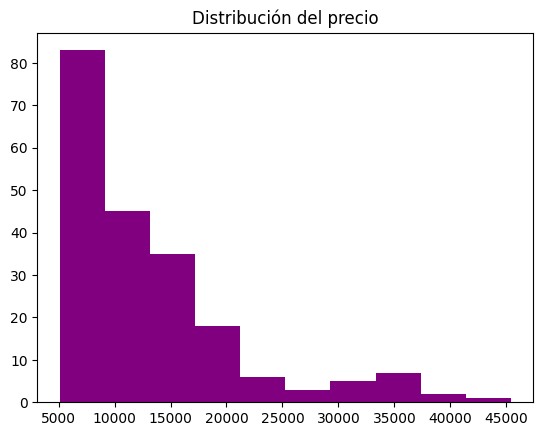

In [87]:
#Antes que nada creo que vale la pena ver si nuestro predictor price tiene un comportamiento lineal

plt.hist(df.price,color="purple")
plt.title("Distribución del precio")
plt.show()

#En general vemos que el precio sigue una distribución lineal, por lo que sí se presta para realizar un método de mínimos cuadrados

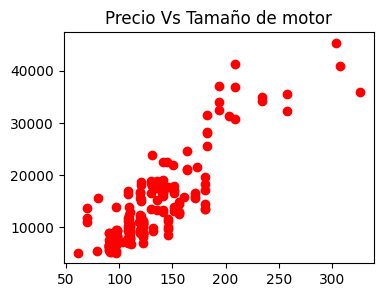

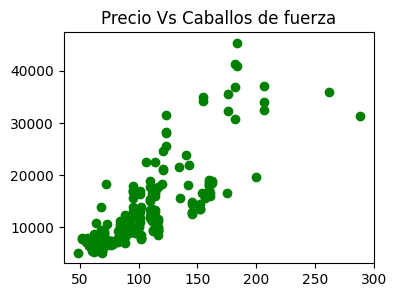

In [107]:
x = (df.CarName).str #Separo el nombre del carro de su marca
x.split(" ")
txt=x[0]+x[1]

plt.figure(figsize=(4,3))
plt.scatter(df.enginesize,df.price,color="red")
plt.title("Precio Vs Tamaño de motor")
plt.show()
#Si se ajusta a un modelo lineal!

plt.figure(figsize=(4,3))
plt.scatter(df.horsepower,df.price,color="green")
plt.title("Precio Vs Caballos de fuerza")
plt.show()
#Si se ajusta a un modelo lineal



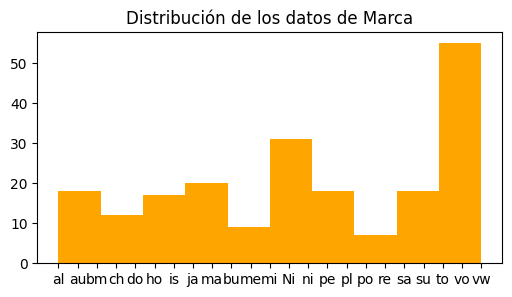

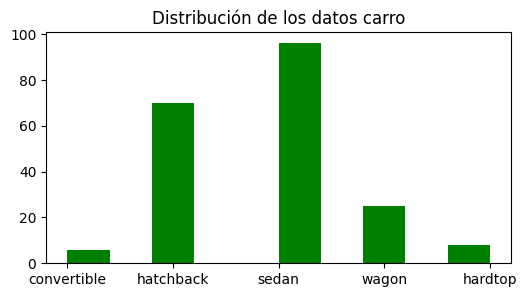

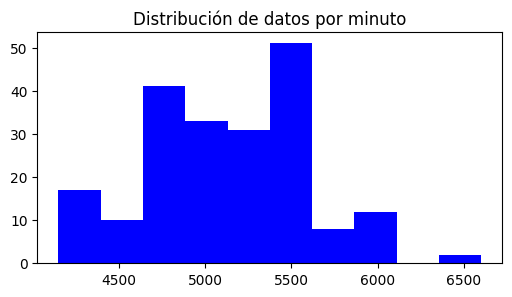

In [112]:
#Histogramas
#Las variables que tienen una distribución d

plt.figure(figsize=(6,3))
plt.hist(txt,color="orange")
plt.title("Distribución de los datos de Marca")
plt.show()
#No se ajusta a un modelo lineal

plt.figure(figsize=(6,3))
plt.hist(df.carbody,color="green")
plt.title("Distribución de los nombres")
plt.show()
#No se ajusta a un modelo lineal

plt.figure(figsize=(6,3))
plt.hist(df.peakrpm,color="blue")
plt.title("Distribución de datos del maximo de revoluciones por minuto")
plt.show()
#No se ajusta a un modelo lineal

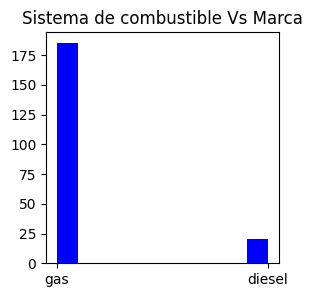

In [103]:
plt.figure(figsize=(3,3))
plt.hist(df.fueltype,color="blue")
plt.title("Sistema de combustible Vs Marca")
plt.show()

In [81]:
pd.get_dummies(df) #Convierto los datos de tipo categóricos a binarios

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0,0,0,0,0,0,0,1,0,0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,...,0,0,0,0,0,0,0,1,0,0
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,...,0,0,0,0,0,0,0,1,0,0
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,...,0,0,0,0,0,0,0,1,0,0
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,...,0,0,0,0,0,1,0,0,0,0


Posibles variables predictoras:

*   Tamaño de motor
*   Caballos de fuerza



In [119]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import pandas as pd

Xh=[df.enginesize,df.horsepower]
th=df.price
print(Xh)
labels=["Tamaño del motor","Caballos de fuerza"]
scaler = StandardScaler()
Xh_norm = scaler.fit_transform(Xh) #Normalizando Xh


[0      130
1      130
2      152
3      109
4      136
      ... 
200    141
201    141
202    173
203    145
204    141
Name: enginesize, Length: 205, dtype: int64, 0      111
1      111
2      154
3      102
4      115
      ... 
200    114
201    160
202    134
203    106
204    114
Name: horsepower, Length: 205, dtype: int64]
